<a href="https://colab.research.google.com/github/jenasandeep/Dataset---Exploration/blob/main/Iris_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


Data handling (pandas)

Visualizations (seaborn, matplotlib)

Machine learning (sklearn)



# Iris Dataset
The Iris is a popular dataset in machine learning and statistics. It was introduced by British mathematician and biologist ***Ronald Fisher***  in his **1936** paper “***The Use of Multiple Measurements in Taxonomic Problems***” as an example of discriminant analysis.

The dataset is a list of iris flowers with ***150 specimens***, each from one of three varieties: ***Setosa, Versiclor, and Virginica***. **Four measurements** are taken for each sample: flower and ***petal length and width,sepal length and width*** in centimeters.

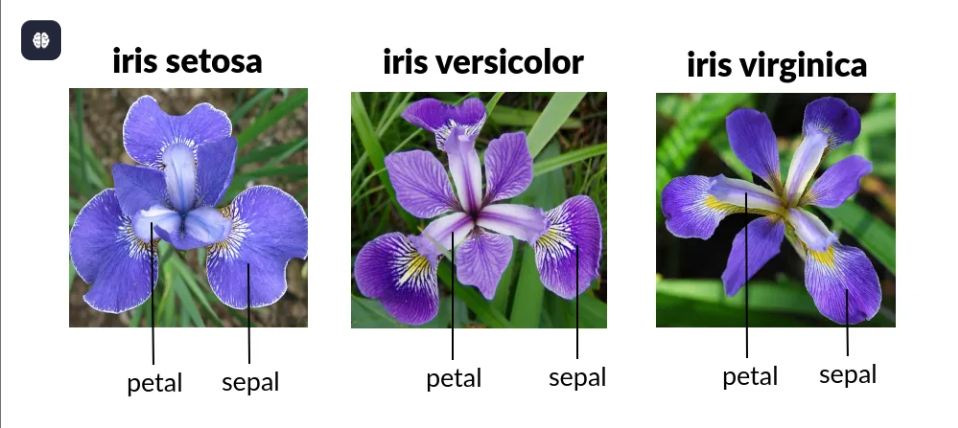

Number of Samples:  150

Number of Features: 4

Target Classes: Setosa, Versicolor, Virginica

# Step 2: Load Dataset

In [ ]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

We load the dataset and convert it into a DataFrame for easier analysis.

 We also add a species column with the flower names instead of numerical codes.



# Step 3: Overview of Data

In [ ]:
print("\nFirst 5 Rows:\n", df.head())
print("\nClass Distribution:\n", df['species'].value_counts())



First 5 Rows:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Class Distribution:
 species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


The dataset contains 150 samples — 50 each of setosa, versicolor, and virginica.

 Balanced classes make it ideal for classification.



# Step 4: Univariate Analysis

<Figure size 1000x600 with 0 Axes>

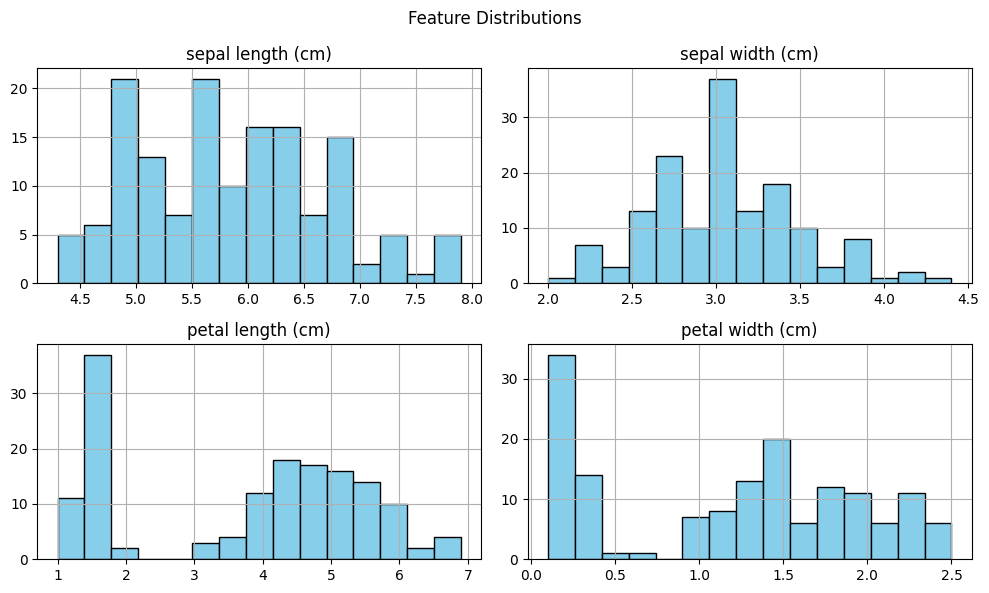

In [ ]:
plt.figure(figsize=(10, 6))
df.drop(columns=['target']).hist(bins=15, figsize=(10, 6), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

 Individual feature distributions using histograms to understand ranges and skewness.

Petal features have clearer separations. Setosa’s petals are smaller, which might help with classification.

# Step 5: Bivariate Analysis

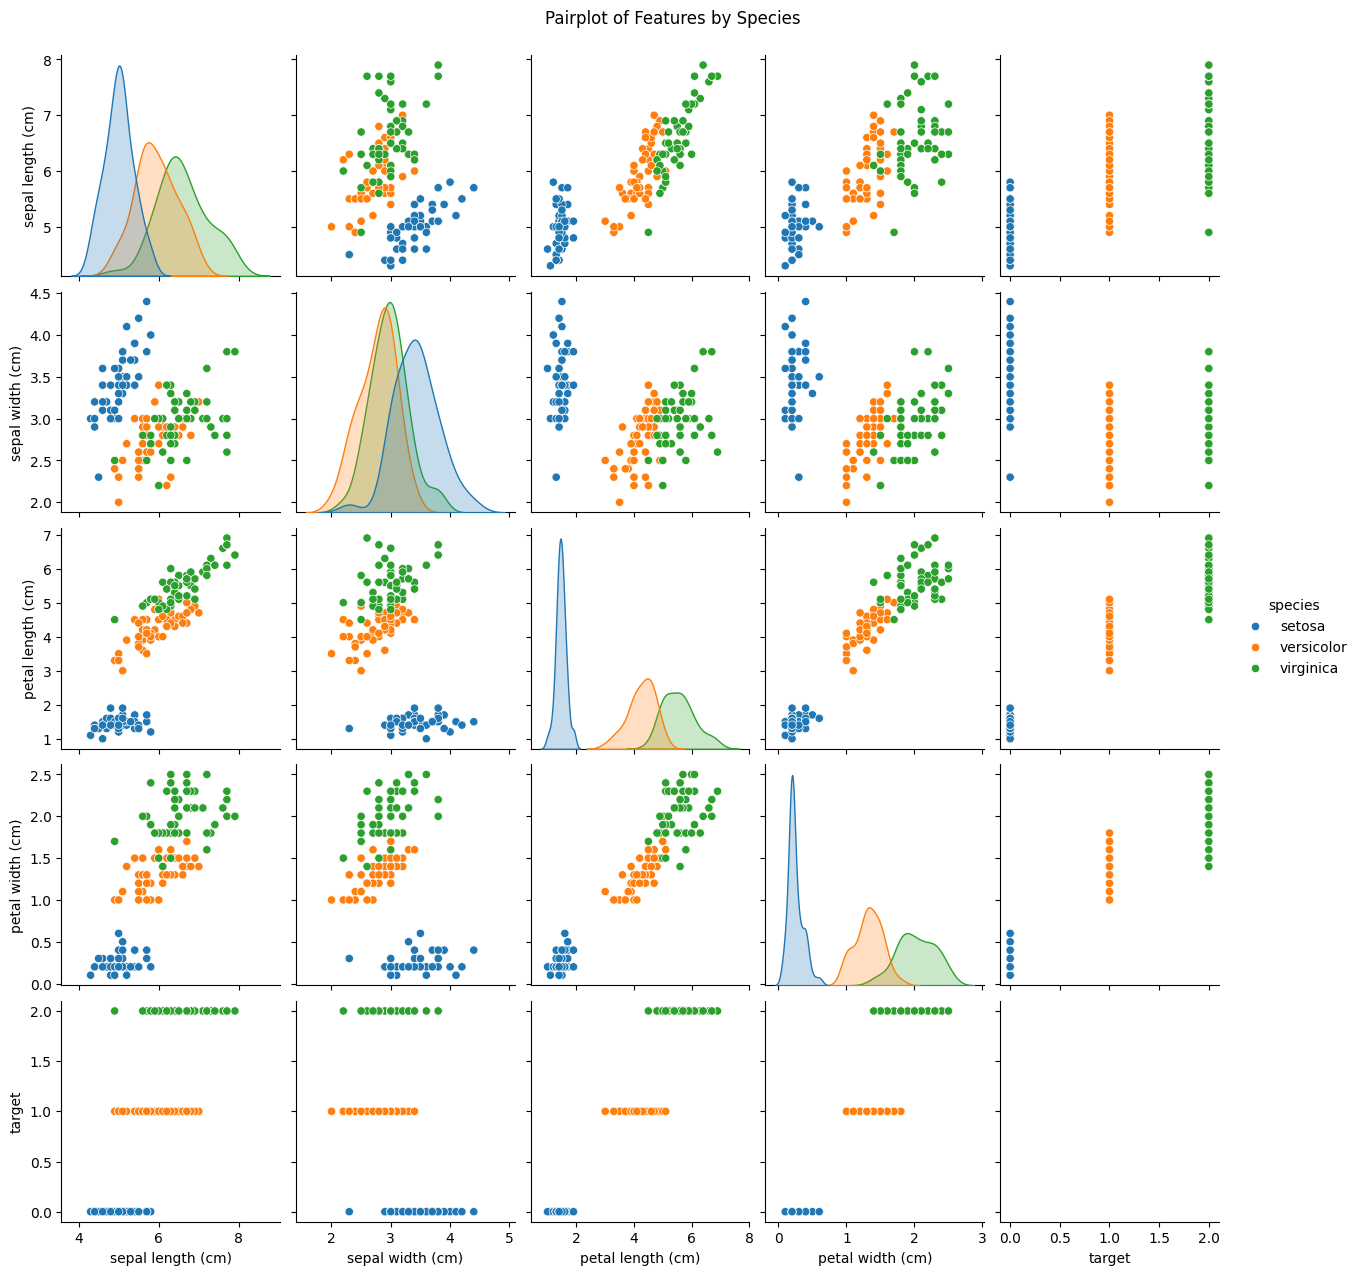

In [ ]:
sns.pairplot(df, hue='species')
plt.suptitle("Pairplot of Features by Species", y=1.02)
plt.show()

Pairplots show scatterplots for every feature pair, colored by species.

Setosa is linearly separable. Versicolor and virginica overlap — more subtle classification is needed.

# Step 6: Boxplot

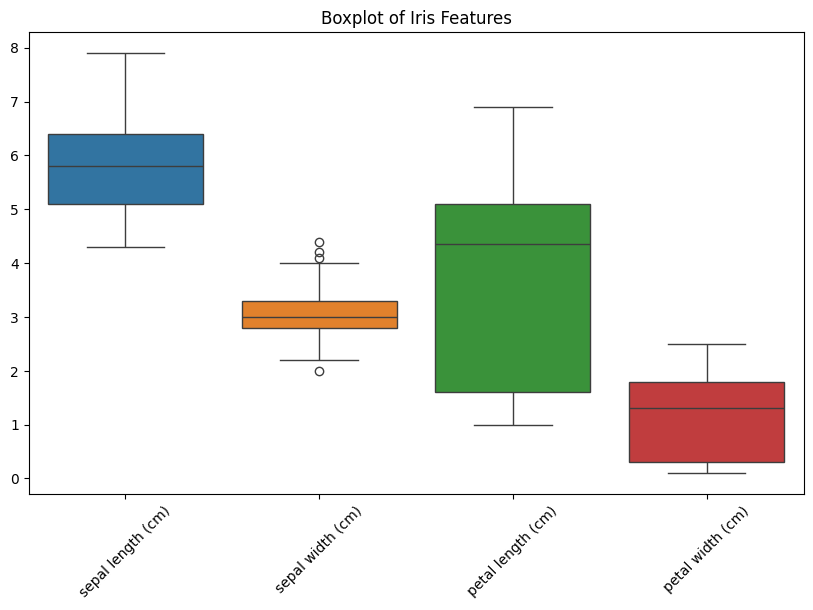

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['target', 'species']))
plt.title("Boxplot of Iris Features")
plt.xticks(rotation=45)
plt.show()


Boxplots help detect outliers and compare medians between features.

Some petal lengths vary a lot in versicolor and virginica — this variability can influence model performance.



# finding And Removing Outliers

In [ ]:
Q1 = df[iris.feature_names].quantile(0.25)
Q3 = df[iris.feature_names].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep only non-outlier rows
df_iqr_filtered = df[~((df[iris.feature_names] < lower_bound) | (df[iris.feature_names] > upper_bound)).any(axis=1)]

print(f"Original shape: {df.shape}")
print(f"After IQR filtering: {df_iqr_filtered.shape}")


Original shape: (150, 6)
After IQR filtering: (146, 6)


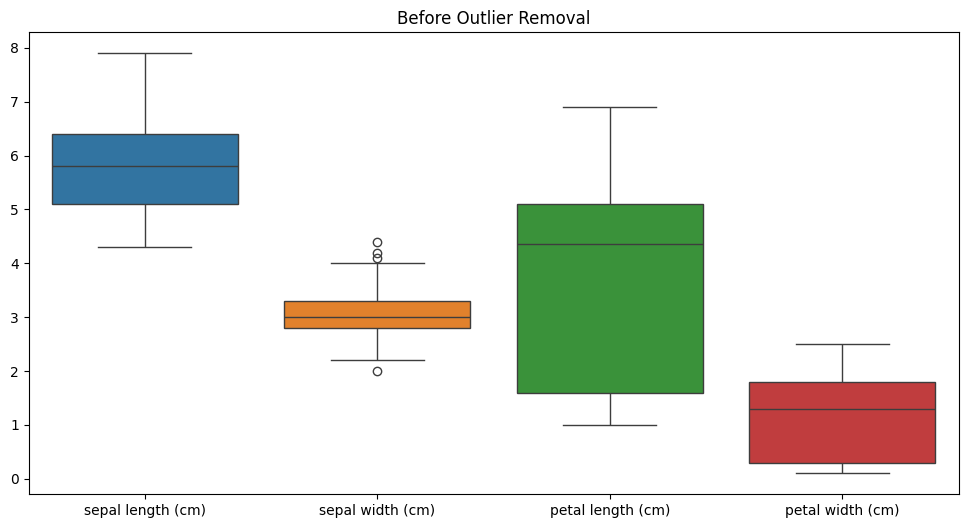

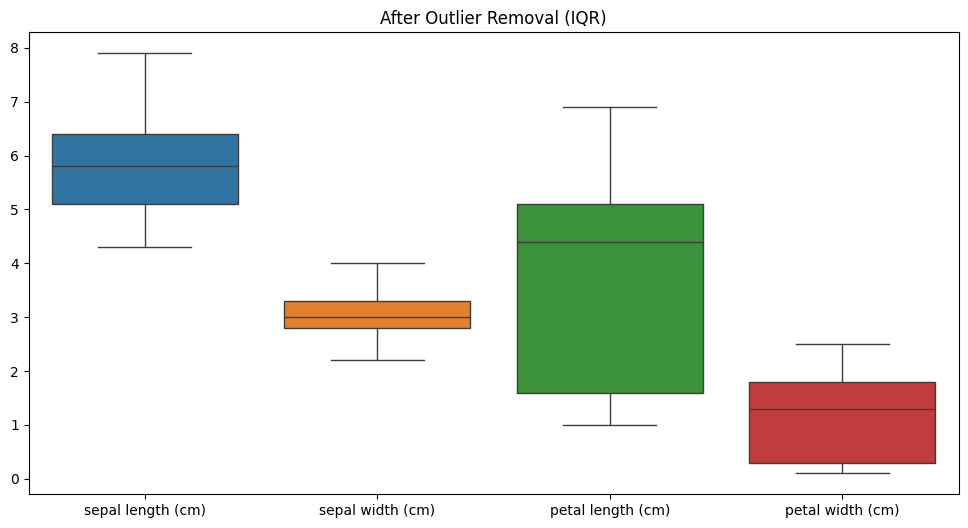

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[iris.feature_names])
plt.title("Before Outlier Removal")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_iqr_filtered[iris.feature_names])
plt.title("After Outlier Removal (IQR)")
plt.show()

# Step 7: Correlation Heatmap

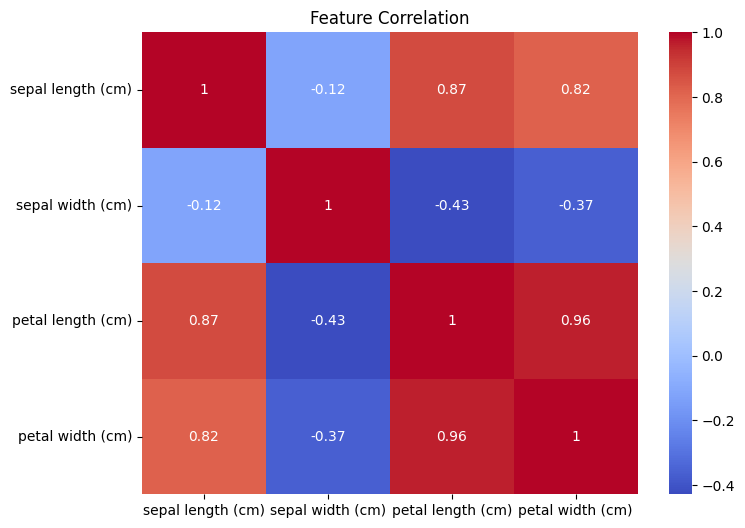

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns=['target', 'species']).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

Heatmaps reveal relationships between features.

Petal length and width are highly correlated — possibly redundant. Sepal features are less correlated.

# Step 8: PCA for Visualization

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris.data)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = df['species']


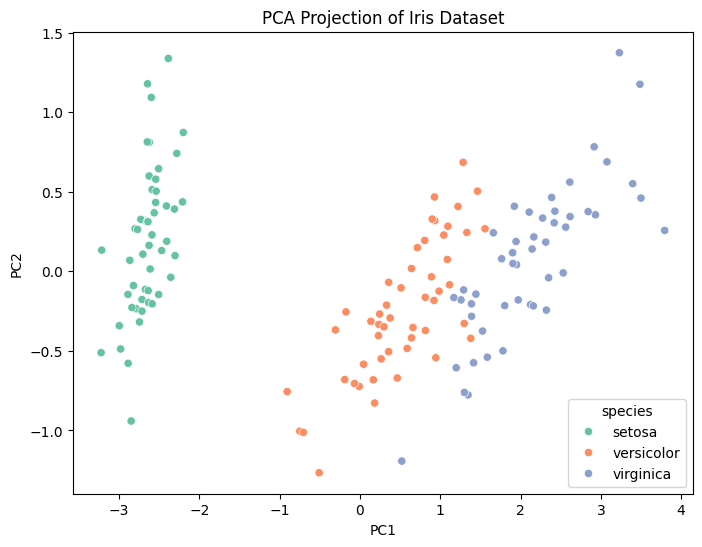

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='species', palette='Set2')
plt.title("PCA Projection of Iris Dataset")
plt.show()


 Principal Component Analysis (PCA) is used to reduce features from 4D to 2D for visualization.

PCA shows clear clustering — especially for setosa. This dimensionality reduction helps understand feature separability.

# Step 9: Train a Classifier

In [ ]:
X = df.iloc[:, :-2]
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)



# Random Forest Model

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("\n📈 Random Forest Report:\n")
print(classification_report(y_test, preds))


📈 Random Forest Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



We split the data and train a Random Forest Classifier to predict flower species.

The model performs with high accuracy. Most errors are between versicolor and virginica — matching our earlier EDA.

# step 10: Logistic Regression Model

In [ ]:
from sklearn.neural_network import MLPClassifier
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
log_reg.fit(X_train, y_train)
log_preds = log_reg.predict(X_test)

print("\n📈 Logistic Regression Report:\n")
print(classification_report(y_test, log_preds))


📈 Logistic Regression Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# Step 11: Neural Network (MLP) Model

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
mlp_preds = mlp.predict(X_test)

print("\n🤖 Neural Network (MLP) Report:\n")
print(classification_report(y_test, mlp_preds))


🤖 Neural Network (MLP) Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


# Step 10: Summary

In [ ]:
print("\n📈 Random Forest Report:\n")
print(classification_report(y_test, preds))
print("\n📈 Logistic Regression Report:\n")
print(classification_report(y_test, log_preds))
print("\n🤖 Neural Network (MLP) Report:\n")
print(classification_report(y_test, mlp_preds))


📈 Random Forest Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30


📈 Logistic Regression Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


🤖 Neural Network (MLP) Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00     

what we learned and how the model benefits from the EDA insights.

📌 Insights:
- Petal features are most discriminative.
- Setosa is linearly separable from other classes.
- Model performs excellently, with rare misclassifications.
- Logistic Regression performs well on linearly separable classes like Setosa.
- Neural Networks can capture non-linear patterns, improving classification of overlapping classes.